In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the tips dataset
tips_df = sns.load_dataset('tips')

In [3]:
# Display the first few rows and basic information
tips_df.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
tips_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [ ]:
# So we don't have any missing values and we can double check it with the following command too
tips_df.isnull().sum()


total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [6]:
# Exploratory Data Analysis (EDA)
# visualize some key aspects of our data:

Text(0.5, 1.0, 'Distribution of Tip Amounts')

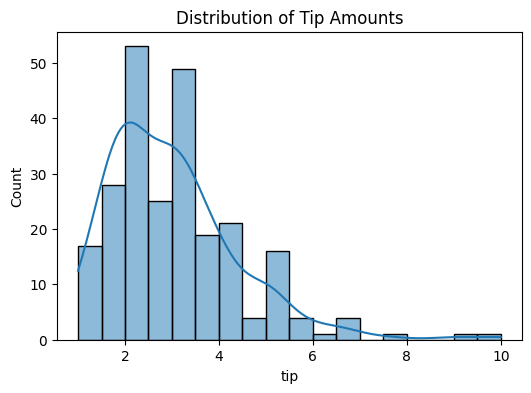

In [7]:
# Distribution of tip amounts
plt.figure(figsize=(6, 4))
sns.histplot(tips_df['tip'], kde=True)
plt.title('Distribution of Tip Amounts')

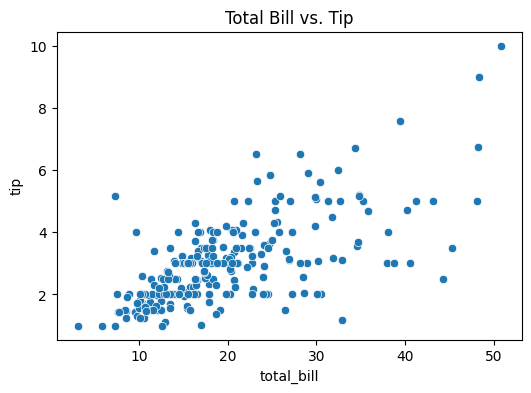

In [8]:
# Relationship between total bill and tip
plt.figure(figsize=(6, 4))
sns.scatterplot(x='total_bill', y='tip', data=tips_df)
plt.title('Total Bill vs. Tip')
plt.show()

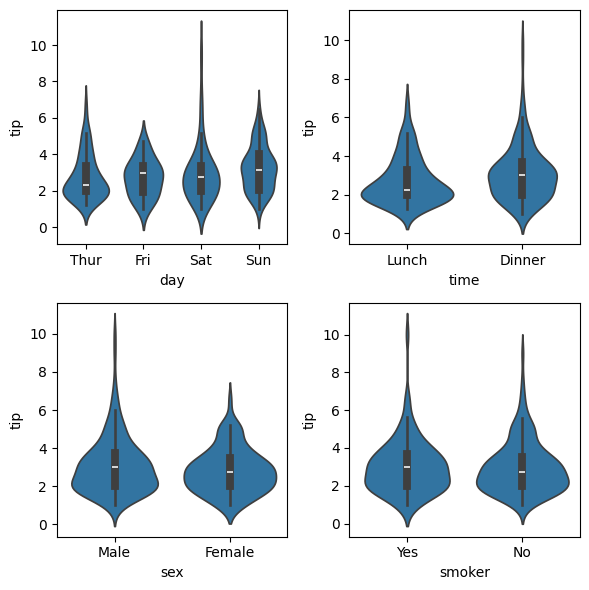

In [9]:
# Box plots/ violin plot for categorical variables
fig, axes = plt.subplots(2, 2, figsize=(6,6))
sns.violinplot(x='day', y='tip', data=tips_df, ax=axes[0, 0])
sns.violinplot(x='time', y='tip', data=tips_df, ax=axes[0, 1])
sns.violinplot(x='sex', y='tip', data=tips_df, ax=axes[1, 0])
sns.violinplot(x='smoker', y='tip', data=tips_df, ax=axes[1, 1])
plt.tight_layout()
plt.show()

In [10]:
# we have only 4 days in chart, beacuase the dataset has 4 days
tips_df['day'].unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

In [11]:
# Categorical encoding for 'sex', 'smoker', and 'time'
tips_df['sex'] = tips_df['sex'].cat.codes
tips_df['smoker'] = tips_df['smoker'].cat.codes
tips_df['time'] = tips_df['time'].cat.codes

# One-hot encoding for 'day'
tips_df = pd.get_dummies(tips_df, columns=['day'], prefix='day')

tips_df.head()

,total_bill,tip,sex,smoker,time,size,day_Thur,day_Fri,day_Sat,day_Sun
0,16.99,1.01,1,1,1,2,False,False,False,True
1,10.34,1.66,0,1,1,3,False,False,False,True
2,21.01,3.50,0,1,1,3,False,False,False,True
3,23.68,3.31,0,1,1,2,False,False,False,True
4,24.59,3.61,1,1,1,4,False,False,False,True


In [12]:
X = tips_df.drop('tip', axis=1)
y = tips_df['tip']

print("Features:", X.columns)

Features: Index(['total_bill', 'sex', 'smoker', 'time', 'size', 'day_Thur', 'day_Fri',
       'day_Sat', 'day_Sun'],
      dtype='object')


In [13]:
# Feature Selection and Engineering

In [14]:
# Correlation Analysis

corr_matrix = tips_df.corr()
corr_matrix.max()
corr_matrix.min()

total_bill   -0.144877
tip          -0.095879
sex          -0.205231
smoker       -0.244316
time         -0.917996
size         -0.142184
day_Thur     -0.917996
day_Fri      -0.244316
day_Sat      -0.500682
day_Sun      -0.500682
dtype: float64

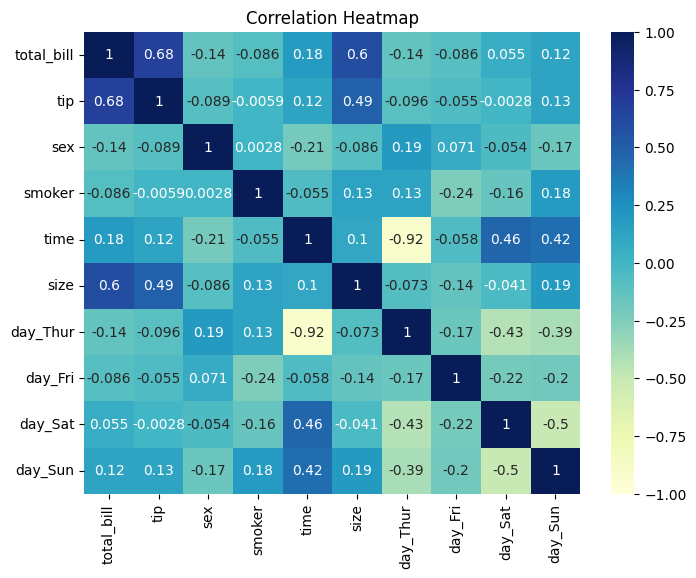

In [15]:
# Plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap')
plt.show()

In [16]:
# Print correlations with 'tip'
corr_matrix['tip'].sort_values(ascending=False)

tip           1.000000
total_bill    0.675734
size          0.489299
day_Sun       0.125114
time          0.121629
day_Sat      -0.002790
smoker       -0.005929
day_Fri      -0.055463
sex          -0.088862
day_Thur     -0.095879
Name: tip, dtype: float64

In [17]:
# tip has strongest correlation with total_bill, size which guide us for deature selection

Visualizing Relationships

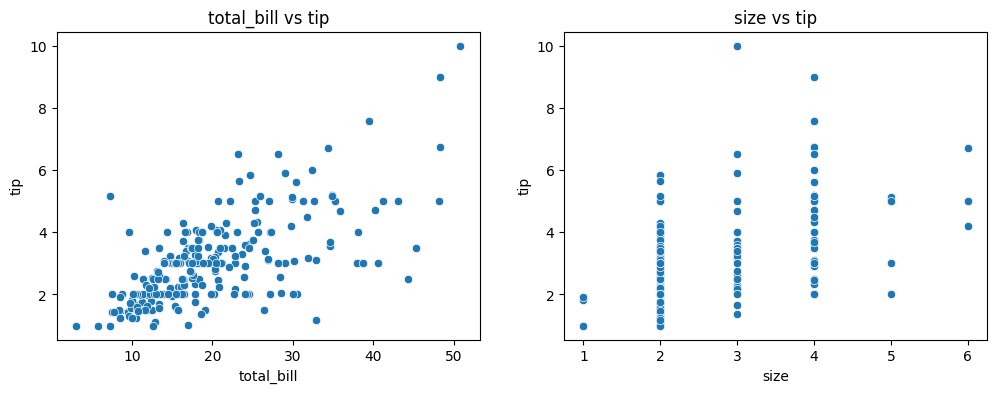

In [18]:
numerical_features = ['total_bill', 'size']
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

for i, feature in enumerate(numerical_features):
    sns.scatterplot(x=feature, y='tip', data=tips_df, ax=axes[i])
    axes[i].set_title(f'{feature} vs tip')

plt.show()  

# x and y parameters specify which columns of your DataFrame should be used for the x-axis and y-axis of the plot

   &#x1F4A1; x and y parameters specify which columns of your DataFrame should be used for the x-axis and y-axis of the plot not only labels



Selecting Initial Features

In [19]:
# Based on our correlation analysis and visualizations, select our initial set of features:

selected_features = ['total_bill', 'size', 'time', 'day_Sat', 'day_Sun']
X_selected = tips_df[selected_features]

print("Selected features:", X_selected.columns)


Selected features: Index(['total_bill', 'size', 'time', 'day_Sat', 'day_Sun'], dtype='object')


Feature Engineering

In [20]:
# create some new features that might improve our model:

1- Tip Percentage:

In [21]:
tips_df['tip_percentage'] = tips_df['tip'] / tips_df['total_bill'] * 100
tips_df

,total_bill,tip,sex,smoker,time,size,day_Thur,day_Fri,day_Sat,day_Sun,tip_percentage
0,16.99,1.01,1,1,1,2,False,False,False,True,5.944673
1,10.34,1.66,0,1,1,3,False,False,False,True,16.054159
2,21.01,3.50,0,1,1,3,False,False,False,True,16.658734
3,23.68,3.31,0,1,1,2,False,False,False,True,13.978041
4,24.59,3.61,1,1,1,4,False,False,False,True,14.680765
...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,0,1,1,3,False,False,True,False,20.392697
240,27.18,2.00,1,0,1,2,False,False,True,False,7.358352
241,22.67,2.00,0,0,1,2,False,False,True,False,8.822232
242,17.82,1.75,0,1,1,2,False,False,True,False,9.820426


2- Per Person Total:


In [22]:
tips_df['per_person_total'] = tips_df['total_bill'] / tips_df['size']
tips_df

,total_bill,tip,sex,smoker,time,size,day_Thur,day_Fri,day_Sat,day_Sun,tip_percentage,per_person_total
0,16.99,1.01,1,1,1,2,False,False,False,True,5.944673,8.495000
1,10.34,1.66,0,1,1,3,False,False,False,True,16.054159,3.446667
2,21.01,3.50,0,1,1,3,False,False,False,True,16.658734,7.003333
3,23.68,3.31,0,1,1,2,False,False,False,True,13.978041,11.840000
4,24.59,3.61,1,1,1,4,False,False,False,True,14.680765,6.147500
...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,0,1,1,3,False,False,True,False,20.392697,9.676667
240,27.18,2.00,1,0,1,2,False,False,True,False,7.358352,13.590000
241,22.67,2.00,0,0,1,2,False,False,True,False,8.822232,11.335000
242,17.82,1.75,0,1,1,2,False,False,True,False,9.820426,8.910000


3- Is Weekend:


In [23]:
tips_df['is_weekend'] = tips_df['day_Sat'] | tips_df['day_Sun']
tips_df

,total_bill,tip,sex,smoker,time,size,day_Thur,day_Fri,day_Sat,day_Sun,tip_percentage,per_person_total,is_weekend
0,16.99,1.01,1,1,1,2,False,False,False,True,5.944673,8.495000,True
1,10.34,1.66,0,1,1,3,False,False,False,True,16.054159,3.446667,True
2,21.01,3.50,0,1,1,3,False,False,False,True,16.658734,7.003333,True
3,23.68,3.31,0,1,1,2,False,False,False,True,13.978041,11.840000,True
4,24.59,3.61,1,1,1,4,False,False,False,True,14.680765,6.147500,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,0,1,1,3,False,False,True,False,20.392697,9.676667,True
240,27.18,2.00,1,0,1,2,False,False,True,False,7.358352,13.590000,True
241,22.67,2.00,0,0,1,2,False,False,True,False,8.822232,11.335000,True
242,17.82,1.75,0,1,1,2,False,False,True,False,9.820426,8.910000,True


4- Party Size Category:


In [24]:
tips_df['party_size_category'] = pd.cut(tips_df['size'], bins=[0, 3, 6, np.inf], labels=['Small', 'Medium', 'Large'])
tips_df = pd.get_dummies(tips_df, columns=['party_size_category'], prefix='party')
tips_df

,total_bill,tip,sex,smoker,time,size,day_Thur,day_Fri,day_Sat,day_Sun,tip_percentage,per_person_total,is_weekend,party_Small,party_Medium,party_Large
0,16.99,1.01,1,1,1,2,False,False,False,True,5.944673,8.495000,True,True,False,False
1,10.34,1.66,0,1,1,3,False,False,False,True,16.054159,3.446667,True,True,False,False
2,21.01,3.50,0,1,1,3,False,False,False,True,16.658734,7.003333,True,True,False,False
3,23.68,3.31,0,1,1,2,False,False,False,True,13.978041,11.840000,True,True,False,False
4,24.59,3.61,1,1,1,4,False,False,False,True,14.680765,6.147500,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,0,1,1,3,False,False,True,False,20.392697,9.676667,True,True,False,False
240,27.18,2.00,1,0,1,2,False,False,True,False,7.358352,13.590000,True,True,False,False
241,22.67,2.00,0,0,1,2,False,False,True,False,8.822232,11.335000,True,True,False,False
242,17.82,1.75,0,1,1,2,False,False,True,False,9.820426,8.910000,True,True,False,False


 &#x1F4A1; pd.cut() is used to segment and sort data values into bins

 &#x1F4A1; pd.get_dummies() is used for (one-hot encoding)

 &#x1F4A1; get_dummies has property prefix

examine our new features:

In [25]:
tips_df.filter(like='party_').columns

Index(['party_Small', 'party_Medium', 'party_Large'], dtype='object')

In [26]:
party_size_columns = tips_df.filter(like='party_').columns.tolist()
tips_df[['tip', 'tip_percentage', 'per_person_total', 'is_weekend'] + party_size_columns].head()

,tip,tip_percentage,per_person_total,is_weekend,party_Small,party_Medium,party_Large
0,1.01,5.944673,8.495000,True,True,False,False
1,1.66,16.054159,3.446667,True,True,False,False
2,3.50,16.658734,7.003333,True,True,False,False
3,3.31,13.978041,11.840000,True,True,False,False
4,3.61,14.680765,6.147500,True,False,True,False


🔑 Feature engineering allows us to incorporate domain knowledge and create new features that might capture important patterns in the data.

Updating Selected Features

selected features to include some of our engineered features

In [27]:
selected_features = ['total_bill', 'size', 'time', 'day_Sat', 'day_Sun', 'tip_percentage', 'per_person_total', 'is_weekend'] + [col for col in tips_df.columns if col.startswith('party_')]
X_selected = tips_df[selected_features]

print("Updated selected features:", X_selected.columns)

Updated selected features: Index(['total_bill', 'size', 'time', 'day_Sat', 'day_Sun', 'tip_percentage',
       'per_person_total', 'is_weekend', 'party_Small', 'party_Medium',
       'party_Large'],
      dtype='object')


Preparing Final Dataset for Modeling


In [28]:
from sklearn.model_selection import train_test_split

X = X_selected.astype(np.float64)
y = tips_df['tip'].astype(np.float64)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (195, 11)
Testing set shape: (49, 11)


In [29]:
assert X_train.shape[0] + X_test.shape[0] == tips_df.shape[0], "Training and testing sets do not match the original dataset size"
assert X_train.shape[1] == X_test.shape[1], "Training and testing sets do not have the same number of features"

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def add_bias_column(X):
    return np.c_[np.ones((X.shape[0], 1)), X]

# np.ones((X.shape[0], 1)) 
# creates a 2D array with one column of ones like np.ones((3, 1)):
# [[1.],
#  [1.],
#  [1.]]
# np.c_[np.ones((X.shape[0], 1)), X]
# np.c_[] is a way to concatenate arrays along the second axis (columns).
# X = np.array([[2, 3],
#               [4, 5],
#               [6, 7]])
# np.c_[np.ones((X.shape[0], 1)), X]
# [[1. 2. 3.],
#  [1. 4. 5.],
#  [1. 6. 7.]]
# Concatenate row-wise result = np.r_[ones_row, X]

# Add a column of ones to X for the intercept term
X_train = add_bias_column(X_train)
X_test = add_bias_column(X_test)



y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

# y_train = y_train.values.reshape(-1, 1)
# This assumes that y_train is a Pandas Series or DataFrame. The .values attribute converts the Pandas object to a NumPy array , 
# and then the reshape(-1, 1) method is applied

we'll start implementing our regression models, beginning with simple linear regression and progressively moving to more complex models

Multiple Linear Regression

Implementing Multiple Linear Regression

In [37]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Initialize the model
lr_model = LinearRegression()

# Fit the model
lr_model.fit(X_train, y_train)

LinearRegression()

Examining the Model

look at the coefficients and intercept of our model:

In [38]:
# Print the intercept and coefficients
print("Intercept:", lr_model.intercept_)
print("\nCoefficients:")
for feature, coef in zip(X.columns, lr_model.coef_):
    print(f"{feature}: {coef}")

Intercept: [-2.28634038]

Coefficients:
total_bill: [ 0.00000000e+00 -1.38777878e-17 -1.38777878e-17  0.00000000e+00
  4.16333634e-17  0.00000000e+00  1.29741305e-01  1.55526849e-01
 -7.07792346e-02  3.79227478e-02 -7.32885787e-02  1.46665680e-01
  9.66458461e-03 -3.53658309e-02 -1.58054871e-02  1.58054871e-02
  0.00000000e+00]


 &#x1F4A1;The coefficients represent the change in the target variable for a one-unit change in the corresponding feature, holding all other features constant.

Model Evaluation

In [42]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

def evaluate_model(model, X_train, y_train, X_test, y_test):
    # Training set performance
    y_train_pred = model.predict(X_train)
    mse_train = mean_squared_error(y_train, y_train_pred)
    rmse_train = np.sqrt(mse_train)
    r2_train = r2_score(y_train, y_train_pred)

    # Test set performance
    y_test_pred = model.predict(X_test)
    mse_test = mean_squared_error(y_test, y_test_pred)
    rmse_test = np.sqrt(mse_test)
    r2_test = r2_score(y_test, y_test_pred)

    print("Training Set Results:")
    print(f"Mean Squared Error: {mse_train}")
    print(f"R-squared: {r2_train}")
    print(f"Root Mean Squared Error: {rmse_train}")
    print("\nTest Set Results:")
    print(f"Mean Squared Error: {mse_test}")
    print(f"R-squared: {r2_test}")
    print(f"Root Mean Squared Error: {rmse_test}")
    return mse_train, rmse_train, r2_train, mse_test, rmse_test, r2_test

# Evaluate the model
mse_train, rmse_train, r2_train, mse_test, rmse_test, r2_test = evaluate_model(lr_model, X_train, y_train, X_test, y_test)

Training Set Results:
Mean Squared Error: 0.3528443643255183
R-squared: 0.826331116137727
Root Mean Squared Error: 0.5940070406363196

Test Set Results:
Mean Squared Error: 0.21557248782631006
R-squared: 0.8275380562589921
Root Mean Squared Error: 0.46429784387428513


🔑 Comparing performance on training and test sets helps us detect overfitting. If the model performs much better on the training set than on the test set, it might be overfitting.

Visualizing Predictions

create a scatter plot to visualize our predicted vs actual tips for the test set:

Text(0.5, 1.0, 'Actual vs Predicted Tips (Test Set)')

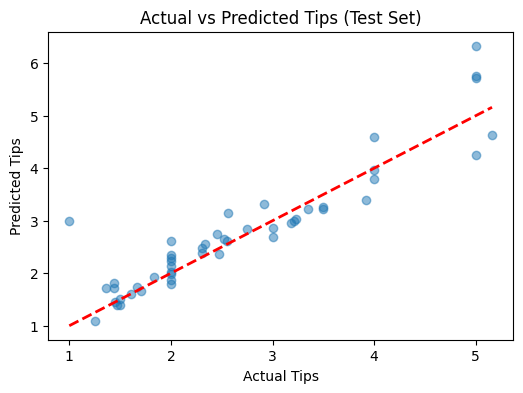

In [43]:
import matplotlib.pyplot as plt

y_test_pred = lr_model.predict(X_test)

plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Tips")
plt.ylabel("Predicted Tips")
plt.title("Actual vs Predicted Tips (Test Set)")

⚠️ Important Note: Points closer to the red line indicate better predictions. Deviations from this line show where our model's predictions are off.

Residual Analysis

let's perform a residual analysis to check for any patterns in our errors

Text(0.5, 1.0, 'Residual Plot (Test Set)')

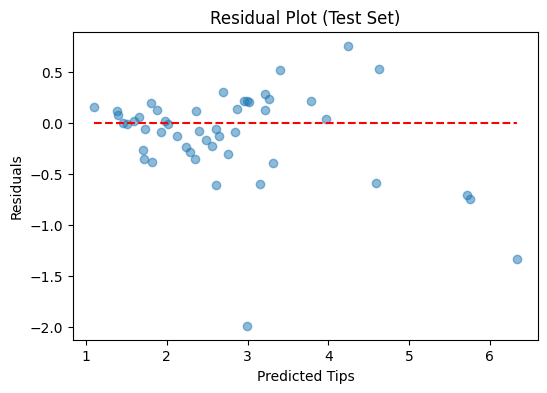

In [44]:
residuals = y_test - y_test_pred

plt.figure(figsize=(6, 4))
plt.scatter(y_test_pred, residuals, alpha=0.5)
plt.hlines(y=0, xmin=y_test_pred.min(), xmax=y_test_pred.max(), colors='r', linestyles='--')
plt.xlabel("Predicted Tips")
plt.ylabel("Residuals")
plt.title("Residual Plot (Test Set)")

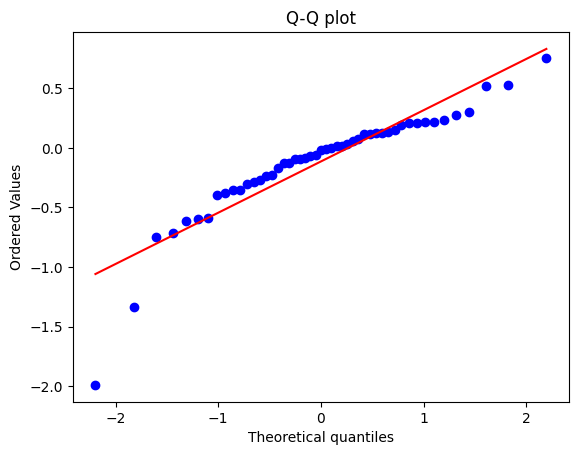

In [45]:
import scipy.stats as stats

fig, ax = plt.subplots()
stats.probplot((y_test - y_test_pred).reshape(-1), plot=ax, fit=True, dist='norm')
ax.set_title("Q-Q plot")
plt.show()

🔑 Key Insight: In an ideal scenario, residuals should be randomly scattered around the horizontal line at y=0. Any visible patterns might indicate that our model is missing some important aspect of the data.

Interpreting the Results

Now that we've built and evaluated our multiple linear regression model, let's interpret our results:

1- Model Performance: Compare the R-squared values for the training and test sets. How much of the variance in tips can our model explain? Is there a significant difference between training and test performance?

2- Overfitting Check: Look at the difference between training and test RMSE. A large difference might indicate overfitting.

3- Feature Importance: Examine the coefficients. Which features seem to have the largest impact on tip amounts?

4- Prediction Accuracy: Consider the RMSE on the test set. On average, how far off are our predictions in dollar terms?

5- Residual Analysis: Are there any patterns in the residual plot that might suggest our model is missing something?

💡 Pro Tip: Remember that while our model can show relationships between features and tips, it doesn't necessarily imply causation. Other factors not included in our dataset might also influence tipping behavior.

By implementing multiple linear regression and carefully evaluating its performance on both training and test sets, we've created a more comprehensive model for predicting tips. In the next sections, we'll explore how we can potentially improve our predictions using more advanced techniques like polynomial regression and regularization.